In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
#import yfinance as yf

In [3]:
#from datetime import datetime

In [9]:
#tickers = ['AMZN','GOOG']
#company_name = ['AMAZON','GOOGLE']

In [5]:
#end = datetime.now()
#start = datetime(end.year-5,end.month,end.day)

In [6]:
#stock_data = {}
#for stock in tickers:
 #   stock_data[stock] = yf.download(stock,start,end)
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
""" for stock, name in zip(tickers, company_name):
    stock_data[stock]['comapany_name'] = name """

In [11]:
""" AMZN = stock_data['AMZN']
GOOG = stock_data['GOOG'] """

In [12]:
"""AMZN.tail(5)"""

,Open,High,Low,Close,Adj Close,Volume,comapany_name
Date,,,,,,,
2024-10-15,187.630005,188.410004,184.580002,187.690002,187.690002,32178900,AMAZON
2024-10-16,187.050003,187.779999,185.610001,186.889999,186.889999,23456800,AMAZON
2024-10-17,188.220001,188.940002,186.000000,187.529999,187.529999,25039400,AMAZON
2024-10-18,187.149994,190.740005,186.279999,188.990005,188.990005,37417700,AMAZON
2024-10-21,188.050003,189.460007,186.399994,189.070007,189.070007,24612200,AMAZON


In [13]:
AMZN.to_csv('AmazonStockPrices.csv')
GOOG.to_csv('GoogleStockPrices.csv')

In [2]:
# Amazon Dataset







df = pd.read_csv('AmazonStockPrices.csv')
data = pd.read_csv('GoogleStockPrices.csv')

In [3]:
df.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume,comapany_name
0,2019-10-22,89.407501,89.488998,88.099998,88.286499,88.286499,42234000,AMAZON


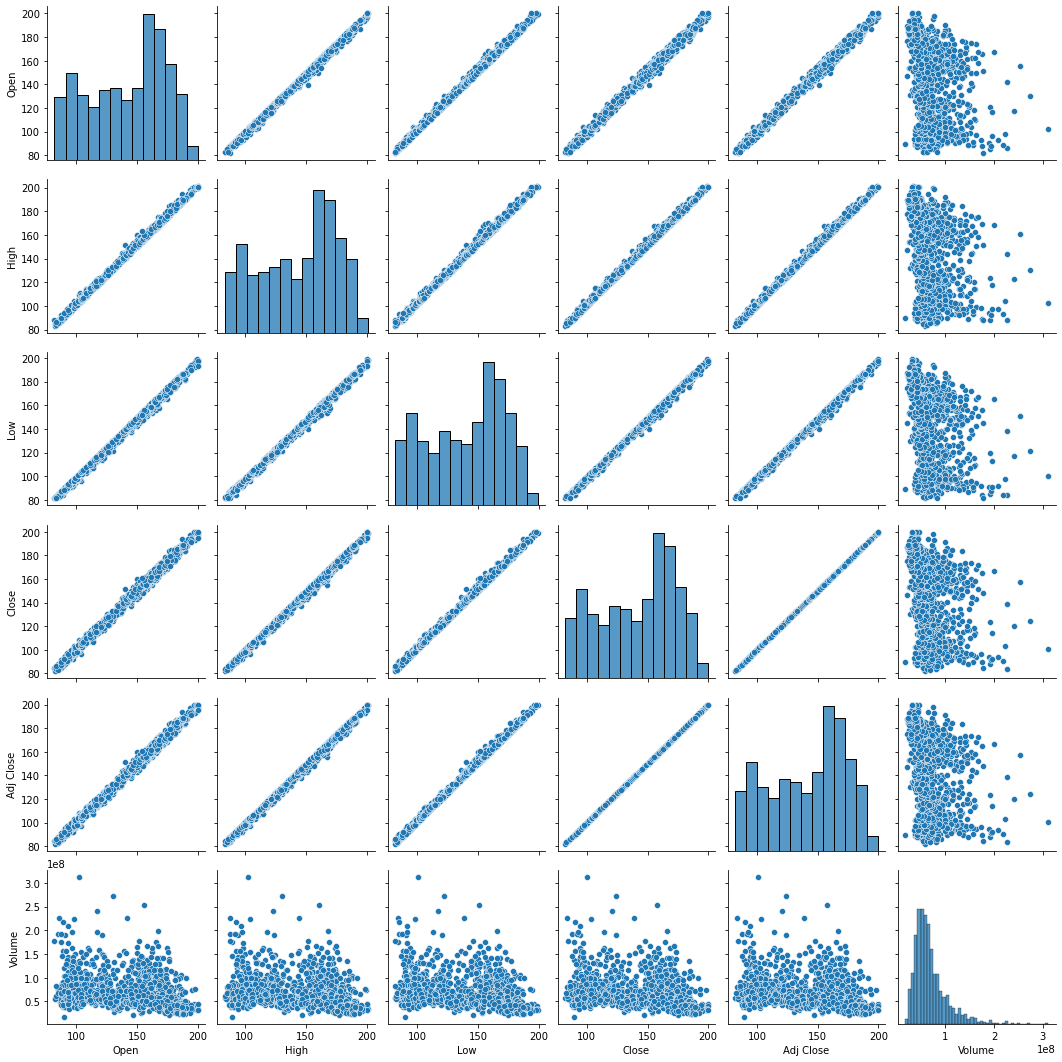

In [4]:
sns.pairplot(data = df)

In [17]:
y = df['Adj Close']
x = df.drop(columns = ['Adj Close','Date','comapany_name','Close'])
x = sm.add_constant(x)

C:\Users\MSI\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [19]:
model = sm.OLS(y_train,x_train).fit()

In [20]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Adj Close   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.232e+05
Date:                Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:47:17   Log-Likelihood:                -1460.0
No. Observations:                1006   AIC:                             2930.
Df Residuals:                    1001   BIC:                             2955.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1364      0.190      0.720      0.4

In [21]:
pred_ols = model.predict(x_test)

In [23]:
mae = mean_absolute_error(y_test, pred_ols)
rmse = mean_squared_error(y_test, pred_ols)
print('MAE',mae)
print('RMSE',rmse)

MAE 0.7837246790649749
RMSE 0.9983876384397908
